In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()
for a in assets: 
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2020-05-14,113.809998,2852.500000
2020-05-15,114.610001,2863.699951
2020-05-18,116.209999,2953.909912
2020-05-19,112.440002,2922.939941
2020-05-20,113.675003,2966.590088


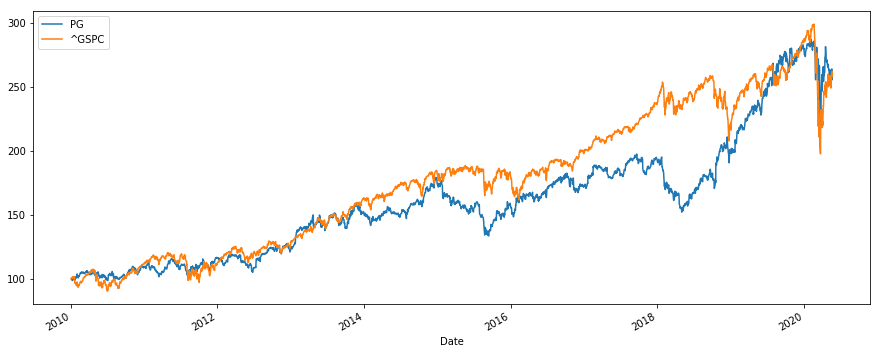

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize = (15,6))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

PG       0.090727
^GSPC    0.092128
dtype: float64

In [8]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029497,0.017867
^GSPC,0.017867,0.030320


In [9]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.597434
^GSPC,0.597434,1.000000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

2

In [12]:
arr = np.random.random(2)
arr

array([0.34129788, 0.73319097])

In [13]:
arr[0] + arr[1]

1.0744888486939057

In [14]:
weights = np.random.random(2)
weights /= np.sum(weights)
weights

array([0.42749123, 0.57250877])

In [15]:
weights[0] + weights[1]

1.0

In [16]:
np.sum(weights * log_returns.mean()) * 250

0.09152902712000476

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.0240738959815954

In [18]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.1551576488014542

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))) 
    
pfolio_returns, pfolio_volatilities

([0.09155720388714177,
  0.09143827030811397,
  0.0915182993789996,
  0.09178869023112031,
  0.09116117551191509,
  0.09076289922877948,
  0.09076466391083898,
  0.09197263204535935,
  0.09128114460071916,
  0.09200265741971947,
  0.09141281343839253,
  0.09164006447273707,
  0.091323476749106,
  0.09178712965747987,
  0.09187826241514295,
  0.09144440790460275,
  0.09205431519580885,
  0.09210948260280592,
  0.09075276287611182,
  0.09150306110732419,
  0.090908404043143,
  0.09148503532748178,
  0.09144978988504156,
  0.09151329169744782,
  0.09151494106520815,
  0.09171125995213839,
  0.09137875985895956,
  0.09198459720842365,
  0.09152502335496614,
  0.09162105658010226,
  0.09159061587232115,
  0.09178574370884872,
  0.09115996390709091,
  0.09144768398691813,
  0.09106916625948634,
  0.0916502744303077,
  0.0910633449015287,
  0.09178525508598159,
  0.09147977638744377,
  0.09207838240763555,
  0.09176212122480935,
  0.09157368741445357,
  0.0916441744355361,
  0.091266282388478

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))) 

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
    
pfolio_returns, pfolio_volatilities

(array([0.09142345, 0.09190202, 0.09171268, 0.09143276, 0.0913837 ,
        0.09092614, 0.09170983, 0.09124186, 0.09186013, 0.0910321 ,
        0.09139435, 0.09146635, 0.09140942, 0.0911722 , 0.09132259,
        0.09116694, 0.09147273, 0.09161589, 0.09167339, 0.09112507,
        0.09154109, 0.09163985, 0.09097577, 0.09155369, 0.09168017,
        0.09121978, 0.09119214, 0.09144492, 0.09129227, 0.0918673 ,
        0.09149883, 0.09165273, 0.09103675, 0.09097294, 0.09141862,
        0.09073104, 0.09155793, 0.09142625, 0.09148669, 0.09149639,
        0.09188187, 0.09154398, 0.09159542, 0.09192134, 0.09211556,
        0.09151294, 0.09201691, 0.09139234, 0.09164047, 0.0917624 ,
        0.09164427, 0.09143478, 0.09136716, 0.09147197, 0.0909774 ,
        0.09162009, 0.09107688, 0.09121278, 0.09155346, 0.09116849,
        0.09156682, 0.09085665, 0.09126108, 0.09159775, 0.09177203,
        0.09091565, 0.09108613, 0.09161768, 0.09118697, 0.09164852,
        0.09076345, 0.09134239, 0.09163408, 0.09

In [21]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [22]:
portfolios.head()

,Return,Volatility
0,0.091423,0.154549
1,0.091902,0.164103
2,0.091713,0.158282
3,0.091433,0.154567
4,0.091384,0.154549


In [23]:
portfolios.tail()

,Return,Volatility
995,0.091966,0.166637
996,0.091214,0.155954
997,0.091706,0.158134
998,0.091542,0.155297
999,0.091186,0.156403


Text(0,0.5,'Expected Return')

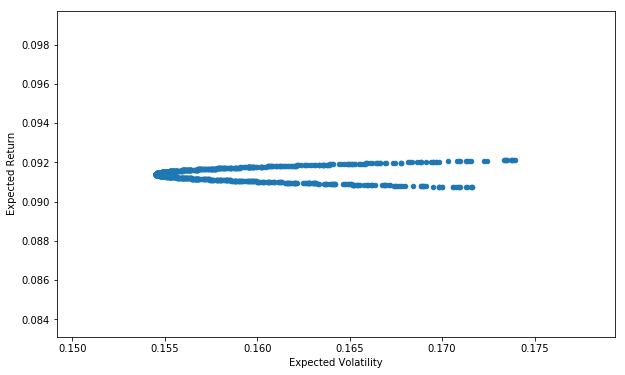

In [24]:
portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')